# Entropy

Entropy could be used with probability to denote the gain of information.

The more homogenious the set is - the lower is the level of entropy.
The lower the entropy - the higher the knowledge gain.

If we have a dataset with two classes evenly distributed we get the low knowledge and high entropy.


$$ 
H(x) = -\sum_{i=1}^n p(x_i) \log_2 p(x_i)
$$

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [5]:
bugs = pd.read_csv('data/ml-bugs.csv')
bugs.head()

,Species,Color,Length (mm)
0,Mobug,Brown,11.6
1,Mobug,Blue,16.3
2,Lobug,Blue,15.1
3,Lobug,Green,23.7
4,Lobug,Blue,18.4


## Information gain

The goal is to split the data getting the highest information gain - lower entropy.

$$ 
Information Gain = Entropy(Parent) - [\frac{m}{m + n}Entropy(Child_1) + \frac{m}{m + n}Entropy(Child_2)]
$$

## Entropy

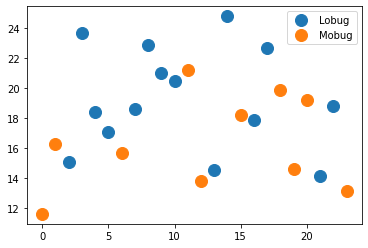

In [47]:
groups = bugs.groupby('Species')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [82]:
#Parent entropy:
mobugs = bugs.groupby('Species').count().reset_index().iloc[1][1]
lobugs = bugs.groupby('Species').count().reset_index().iloc[0][1]
all_bugs = mobugs+lobugs
print('No of mobugs: {}, no of lobugs: {}'.format(mobugs, lobugs))

entropy = -(lobugs/all_bugs)*math.log(lobugs/all_bugs) - (mobugs/all_bugs)*math.log(mobugs/all_bugs)
print('Parent entropy: {}'.format(entropy))

No of mobugs: 10, no of lobugs: 14
Parent entropy: 0.6791932659915256


## Entropy for Species


In [66]:
number_of_records = bugs.shape[0]
number_of_lobug = bugs[bugs['Species']=='Lobug'].count().reset_index(name="count").loc[0][1]
number_of_mobug = bugs[bugs['Species']=='Mobug'].count().reset_index(name="count").loc[0][1]

entropy = -(number_of_lobug/number_of_records)*math.log(number_of_lobug/number_of_records) - (number_of_mobug/number_of_records)*math.log(number_of_mobug/number_of_records)

entropy

0.6791932659915256

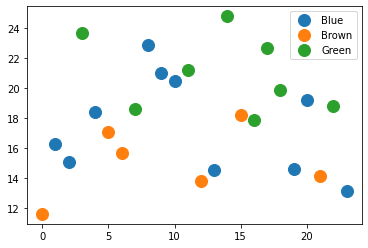

In [67]:
groups = bugs.groupby('Color')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.index, group['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

## Entropy for Colors

In [68]:
number_of_records = bugs.shape[0]
number_of_blue = bugs[bugs['Color']=='Blue'].count().reset_index(name="count").loc[0][1]
number_of_brown = bugs[bugs['Color']=='Brown'].count().reset_index(name="count").loc[0][1]
number_of_green = bugs[bugs['Color']=='Green'].count().reset_index(name="count").loc[0][1]

entropy = -(number_of_blue/number_of_records)*math.log(number_of_blue/number_of_records) - (number_of_brown/number_of_records)*math.log(number_of_brown/number_of_records) - - (number_of_green/number_of_records)*math.log(number_of_green/number_of_records)

entropy

0.3451481346213944

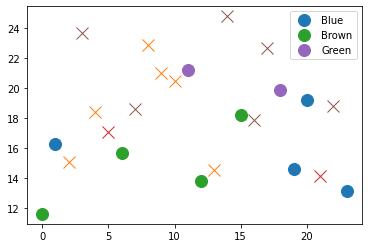

In [44]:
groups = bugs.groupby('Color')
# Plot
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group[group['Species']=='Mobug'].index, group[group['Species']=='Mobug']['Length (mm)'], marker='o', linestyle='', ms=12, label=name)
    ax.plot(group[group['Species']=='Lobug'].index, group[group['Species']=='Lobug']['Length (mm)'], marker='x', linestyle='', ms=12)
ax.legend()

plt.show()

In [26]:
for group in groups_lobug:
    print(group)

('Blue',    Species Color  Length (mm)
2    Lobug  Blue         15.1
4    Lobug  Blue         18.4
8    Lobug  Blue         22.9
9    Lobug  Blue         21.0
10   Lobug  Blue         20.5
13   Lobug  Blue         14.5)
('Brown',    Species  Color  Length (mm)
5    Lobug  Brown         17.1
21   Lobug  Brown         14.1)
('Green',    Species  Color  Length (mm)
3    Lobug  Green         23.7
7    Lobug  Green         18.6
14   Lobug  Green         24.8
16   Lobug  Green         17.9
17   Lobug  Green         22.7
22   Lobug  Green         18.8)


In [36]:
for group in groups:
    print(type(group[1]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [39]:
group[group['Species']=='Mobug']['Length (mm)']

1     16.3
19    14.6
20    19.2
23    13.1
Name: Length (mm), dtype: float64

In [38]:
group['Length (mm)']

1     16.3
2     15.1
4     18.4
8     22.9
9     21.0
10    20.5
13    14.5
19    14.6
20    19.2
23    13.1
Name: Length (mm), dtype: float64